In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

from datetime import datetime as dt

pd.set_option("display.max_rows", None, "display.max_columns", None)

In [2]:
# create the dataframe with the data in covid_cdc_20205264.csv
df = pd.read_csv('covid19-cdc-20205264.csv', keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

In [3]:
df.shape

(10000, 12)

In [4]:
df.head()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/12/31,2021/01/27,2021/01/04,2020/12/31,Probable Case,Female,50 - 59 Years,"Multiple/Other, Non-Hispanic",No,No,No,Yes
1,2020/09/29,2020/10/09,NaN,2020/09/29,Laboratory-confirmed case,Female,50 - 59 Years,"Native Hawaiian/Other Pacific Islander, Non-Hi...",No,Missing,No,Missing
2,2020/11/25,NaN,NaN,NaN,Laboratory-confirmed case,Female,40 - 49 Years,Unknown,Unknown,Missing,No,Missing
3,2020/11/14,2020/11/25,NaN,2020/11/14,Laboratory-confirmed case,Male,60 - 69 Years,"White, Non-Hispanic",No,Unknown,No,Yes
4,2020/11/16,2020/11/23,2020/11/17,2020/11/16,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,No,No,No,No


In [5]:
df.tail()

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
9995,2020/12/30,NaN,NaN,NaN,Laboratory-confirmed case,Female,60 - 69 Years,Unknown,Missing,Missing,No,Missing
9996,2020/08/18,NaN,NaN,NaN,Laboratory-confirmed case,Female,20 - 29 Years,"Multiple/Other, Non-Hispanic",Missing,Missing,No,Missing
9997,2020/09/25,2020/09/25,NaN,NaN,Laboratory-confirmed case,Male,20 - 29 Years,"Black, Non-Hispanic",Missing,Missing,No,Missing
9998,2020/11/08,2020/11/15,2020/11/08,NaN,Laboratory-confirmed case,Male,60 - 69 Years,"White, Non-Hispanic",Missing,Missing,No,Missing
9999,2020/07/31,NaN,NaN,NaN,Laboratory-confirmed case,Female,40 - 49 Years,Unknown,Missing,Missing,No,Missing


In [6]:
df.dtypes


cdc_case_earliest_dt       object
cdc_report_dt              object
pos_spec_dt                object
onset_dt                   object
current_status             object
sex                        object
age_group                  object
race_ethnicity_combined    object
hosp_yn                    object
icu_yn                     object
death_yn                   object
medcond_yn                 object
dtype: object

In [7]:
categorical_columns = df[['current_status', 'sex', 'age_group', 'race_ethnicity_combined', 'hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn']].columns

for column in categorical_columns:
    df[column] = df[column].astype('category')

In [8]:
continuous_columns = df.select_dtypes(['object']).columns

for column in continuous_columns:
    df[column] = pd.to_datetime(df[column])

In [9]:
print(df.dtypes)

cdc_case_earliest_dt       datetime64[ns]
cdc_report_dt              datetime64[ns]
pos_spec_dt                datetime64[ns]
onset_dt                   datetime64[ns]
current_status                   category
sex                              category
age_group                        category
race_ethnicity_combined          category
hosp_yn                          category
icu_yn                           category
death_yn                         category
medcond_yn                       category
dtype: object


In [10]:
continuous_columns

Index(['cdc_case_earliest_dt', 'cdc_report_dt', 'pos_spec_dt', 'onset_dt'], dtype='object')

In [11]:
categorical_columns

Index(['current_status', 'sex', 'age_group', 'race_ethnicity_combined',
       'hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn'],
      dtype='object')

In [12]:
# the first method, df.duplicated() assumes keep=First
print('Number of duplicate rows, excluding the first rows, in the table: ', df.duplicated().sum())

# the second method, not df.duplicated(keep=False)
print('Number of duplicaet rows, including the first rows, in the table: ', df.duplicated(keep=False).sum())

Number of duplicate rows, excluding the first rows, in the table:  482
Number of duplicaet rows, including the first rows, in the table:  860


In [13]:
df[df.duplicated(keep=False)]

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
11,2020-12-28,NaT,NaT,NaT,Laboratory-confirmed case,Male,50 - 59 Years,Unknown,Unknown,Missing,No,Missing
18,2021-01-03,2021-01-07,NaT,2021-01-03,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",No,Missing,No,Missing
23,2020-12-30,NaT,NaT,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Missing,Missing,No,Missing
30,2020-12-10,NaT,NaT,NaT,Laboratory-confirmed case,Female,40 - 49 Years,Unknown,Missing,Missing,No,Missing
75,2020-12-19,NaT,NaT,NaT,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,Unknown,Missing,No,Missing
76,2020-12-23,NaT,NaT,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,Missing,No,Missing
80,2020-12-17,NaT,NaT,NaT,Laboratory-confirmed case,Male,50 - 59 Years,Unknown,Unknown,Missing,No,Missing
103,2021-01-05,NaT,NaT,NaT,Laboratory-confirmed case,Female,40 - 49 Years,Unknown,Unknown,Missing,No,Missing
116,2020-12-10,NaT,NaT,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Missing,Missing,No,Missing
122,2021-01-06,NaT,NaT,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Missing,Missing,No,Missing


In [14]:
df[df.duplicated()]

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
214,2020-12-10,NaT,NaT,NaT,Laboratory-confirmed case,Female,40 - 49 Years,Unknown,Missing,Missing,No,Missing
348,2020-09-29,2020-09-29,NaT,2020-09-29,Laboratory-confirmed case,Female,10 - 19 Years,Unknown,No,Missing,No,Missing
471,2021-01-06,NaT,NaT,NaT,Laboratory-confirmed case,Female,50 - 59 Years,Unknown,Missing,Missing,No,Missing
616,2020-12-30,NaT,NaT,NaT,Laboratory-confirmed case,Male,10 - 19 Years,Unknown,Missing,Missing,No,Missing
665,2020-12-09,NaT,NaT,NaT,Laboratory-confirmed case,Female,60 - 69 Years,Unknown,Unknown,Missing,No,Missing
670,2020-12-30,NaT,NaT,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Missing,Missing,No,Missing
792,2020-12-10,NaT,NaT,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Missing,Missing,No,Missing
834,2021-01-11,NaT,NaT,NaT,Laboratory-confirmed case,Female,60 - 69 Years,"White, Non-Hispanic",Missing,Missing,No,Missing
1102,2020-12-20,NaT,NaT,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Missing,Missing,No,Missing
1114,2020-12-14,2020-12-14,NaT,NaT,Probable Case,Female,10 - 19 Years,Unknown,No,Missing,No,Missing


In [15]:
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
current_status,10000,2,Laboratory-confirmed case,9334
sex,10000,4,Female,5155
age_group,10000,10,20 - 29 Years,1828
race_ethnicity_combined,10000,9,Unknown,3952
hosp_yn,10000,5,No,5243
icu_yn,10000,4,Missing,7649
death_yn,10000,2,No,9656
medcond_yn,10000,4,Missing,7448


In [16]:
df.select_dtypes(include=['datetime64']).describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max
cdc_case_earliest_dt,10000,2020-10-04 06:15:33.120000256,2020-01-02,2020-07-24,2020-11-06,2020-12-15,2021-01-16
cdc_report_dt,7689,2020-10-15 14:40:58.056964608,2020-01-20,2020-08-14,2020-11-10,2020-12-20,2021-01-29
pos_spec_dt,2805,2020-09-15 20:46:27.593583104,2020-01-12,2020-07-02,2020-10-12,2020-12-01,2021-01-25
onset_dt,5034,2020-09-20 13:57:51.275327744,2020-01-02,2020-07-13,2020-10-17,2020-12-01,2021-01-26


In [17]:
dfNaN = df.copy(deep=True)

In [18]:
dfNaN.replace('Missing', np.nan, inplace=True)

In [19]:
dfNaN.isnull().sum()

cdc_case_earliest_dt          0
cdc_report_dt              2311
pos_spec_dt                7195
onset_dt                   4966
current_status                0
sex                          10
age_group                    15
race_ethnicity_combined      89
hosp_yn                    2366
icu_yn                     7649
death_yn                      0
medcond_yn                 7448
dtype: int64

In [20]:
miss_perc = {}
for column in df:
    temp = round(((dfNaN[column].isnull().sum() / (dfNaN.shape[0]))*100),2)
    miss_perc[column] = temp

print(miss_perc)

{'cdc_case_earliest_dt': 0.0, 'cdc_report_dt': 23.11, 'pos_spec_dt': 71.95, 'onset_dt': 49.66, 'current_status': 0.0, 'sex': 0.1, 'age_group': 0.15, 'race_ethnicity_combined': 0.89, 'hosp_yn': 23.66, 'icu_yn': 76.49, 'death_yn': 0.0, 'medcond_yn': 74.48}


In [21]:
# .value_counts() counts number of times a unique entry is entered
df['current_status'].value_counts()

Laboratory-confirmed case    9334
Probable Case                 666
Name: current_status, dtype: int64

In [22]:
df['sex'].value_counts()

Female     5155
Male       4749
Unknown      86
Missing      10
Name: sex, dtype: int64

In [23]:
df['age_group'].value_counts()

20 - 29 Years    1828
30 - 39 Years    1600
40 - 49 Years    1494
50 - 59 Years    1440
10 - 19 Years    1036
60 - 69 Years    1028
70 - 79 Years     626
80+ Years         487
0 - 9 Years       446
Missing            15
Name: age_group, dtype: int64

In [24]:
df['race_ethnicity_combined'].value_counts()

Unknown                                                 3952
White, Non-Hispanic                                     3452
Hispanic/Latino                                          960
Black, Non-Hispanic                                      672
Multiple/Other, Non-Hispanic                             525
Asian, Non-Hispanic                                      267
Missing                                                   89
American Indian/Alaska Native, Non-Hispanic               61
Native Hawaiian/Other Pacific Islander, Non-Hispanic      22
Name: race_ethnicity_combined, dtype: int64

In [25]:
df['hosp_yn'].value_counts()

No         5243
Missing    2366
Unknown    1704
Yes         685
OTH           2
Name: hosp_yn, dtype: int64

In [26]:
df['death_yn'].value_counts()

No     9656
Yes     344
Name: death_yn, dtype: int64

In [27]:
df['icu_yn'].value_counts()

Missing    7649
Unknown    1315
No          967
Yes          69
Name: icu_yn, dtype: int64

In [28]:
df['medcond_yn'].value_counts()

Missing    7448
No          939
Yes         849
Unknown     764
Name: medcond_yn, dtype: int64

In [29]:
# Check how many rows contain a missing value
row_inc_nan = df.apply(lambda x: x.isnull().any(), axis=1)
num_rows_nan = len(row_inc_nan[row_inc_nan == True].index)
print('Number of Rows in dataframe which contain NaN in any column:', num_rows_nan)

# Deduct previous answer from the size of the dataframe to determine how many rows are 
# completely full
num_rows_not_nan = (df.shape[0]) - num_rows_nan
print('Number of Rows in dataframe which do not contain NaN in any column:', num_rows_not_nan)

# get the percentage miss for the rows
nan_perc = round(((num_rows_nan / (df.shape[0]))*100),2)
print('Percentage of rows missing information: '+ str(nan_perc)+'%')

Number of Rows in dataframe which contain NaN in any column: 8469
Number of Rows in dataframe which do not contain NaN in any column: 1531
Percentage of rows missing information: 84.69%


## Descriptive Statistics: Continuous Features

In [30]:
# Calculate the range of the continuous features and show the number of times
# each entry is entered

for column in continuous_columns:
    print(column)
    print("-------------\n")
    print("Range {} is: ".format(column), (df[column].max() - df[column].min()))
    print("-------------")
    print(df[column].value_counts(), "\n\n\n")

cdc_case_earliest_dt
-------------

Range cdc_case_earliest_dt is:  380 days 00:00:00
-------------
2021-01-04    120
2020-12-29    111
2020-12-14    108
2021-01-05    106
2020-11-30    106
2020-12-28    103
2020-12-30    102
2021-01-06    100
2020-12-08    100
2020-12-17     94
2021-01-07     94
2020-12-31     94
2020-12-15     94
2020-12-04     89
2020-12-21     88
2020-12-23     86
2020-12-07     83
2020-12-22     83
2021-01-08     83
2021-01-12     83
2020-12-18     83
2020-12-01     81
2020-12-16     79
2020-12-10     78
2020-12-02     78
2020-11-23     78
2020-12-09     77
2021-01-14     76
2020-11-25     75
2020-12-03     75
2020-12-11     73
2021-01-11     72
2021-01-02     69
2020-12-26     68
2020-11-19     67
2020-11-20     65
2020-12-06     64
2020-12-27     63
2020-12-12     63
2020-11-17     62
2020-11-24     60
2020-11-14     59
2021-01-13     59
2020-11-03     59
2020-11-16     59
2021-01-10     58
2020-11-12     57
2020-11-10     57
2021-01-01     57
2020-11-18     57


In [31]:
#get the cardinality for the continuous features
features_cardinality = list(df[continuous_columns].columns.values)

print('{0:35}   {1}'.format("Feature", "Cardinality"))
print('{0:35}   {1}'.format("-------", "-----------"))

for c in features_cardinality:
    print('{0:35}   {1}'.format(c, str(len(df[c].unique()))))

Feature                               Cardinality
-------                               -----------
cdc_case_earliest_dt                  320
cdc_report_dt                         327
pos_spec_dt                           314
onset_dt                              320


## Check Logical Integrity of Data

In [32]:
# cdc_report_dt is earlier than cdc_case_earliest_dt
test_1a = df[['cdc_case_earliest_dt', 'cdc_report_dt', 'onset_dt']][df['cdc_report_dt']<df['cdc_case_earliest_dt']]
print("Number of rows cdc_report_dt is earlier than cdc_case_earliest_dt:", test_1a.shape[0])

# onset is earlier than cdc_case_earliest_dt
test_1d = df[['cdc_case_earliest_dt', 'cdc_report_dt', 'onset_dt']][df['onset_dt']<df['cdc_case_earliest_dt']]
print("Number of rows onset is earlier than cdc_case_earliest_dt:", test_1d.shape[0])

# pos_spec_dt is earlier than cdc_case_earliest_dt
test_1i = df[['pos_spec_dt', 'cdc_case_earliest_dt']][df['pos_spec_dt']<df['cdc_case_earliest_dt']]
print("Number of rows pos_spec_dt is earlier than cdc_case_earliest_dt:", test_1i.shape[0])

# pos_spec_dt is earlier than onset_dt
test_1h = df[['pos_spec_dt', 'onset_dt']][df['pos_spec_dt']<df['onset_dt']]
print("Number of rows pos_spec_dt is earlier than onset_dt:", test_1h.shape[0])

# cdc_report_dt is later than onset_dt
test_1f = df[['cdc_case_earliest_dt', 'cdc_report_dt', 'onset_dt']][df['cdc_report_dt']>df['onset_dt']]
print("Number of rows cdc_report_dt is later than onset_dt:", test_1f.shape[0])

# cdc_report_dt is earlier than onset_dt
test_1g = df[['cdc_case_earliest_dt', 'cdc_report_dt', 'onset_dt']][df['cdc_report_dt']<df['onset_dt']]
print("Number of rows cdc_report_dt is earlier than onset_dt:", test_1g.shape[0])

Number of rows cdc_report_dt is earlier than cdc_case_earliest_dt: 26
Number of rows onset is earlier than cdc_case_earliest_dt: 1
Number of rows pos_spec_dt is earlier than cdc_case_earliest_dt: 70
Number of rows pos_spec_dt is earlier than onset_dt: 72
Number of rows cdc_report_dt is later than onset_dt: 3500
Number of rows cdc_report_dt is earlier than onset_dt: 39


In [33]:
# Return a list of indexs where icu is yes
hosp_unk_icuy = df.apply(lambda x: True if (x['icu_yn'] == 'Yes') else False, axis=1)
hosp_unk_icuy = hosp_unk_icuy.index[hosp_unk_icuy]

hosp_unk_icuy_df = df[['hosp_yn','icu_yn']].iloc[hosp_unk_icuy]   

In [34]:
# compare icu yes with hosp unknown
hosp_unk_icuy_df[['hosp_yn']].value_counts()

hosp_yn
Yes        68
No          1
Missing     0
OTH         0
Unknown     0
dtype: int64

In [35]:
# Return a list of indexs where hosp is No
hospn_icuu = df.apply(lambda x: True if (x['hosp_yn'] == 'No') else False, axis=1)
hospn_icuu = hospn_icuu.index[hospn_icuu]

hospn_icuu_df = df[['hosp_yn','icu_yn']].iloc[hospn_icuu]  

In [36]:
# compare hosp no and icu unknown
hospn_icuu_df[['icu_yn']].value_counts()

icu_yn 
Missing    3827
No          798
Unknown     617
Yes           1
dtype: int64

## Prepare a table with descriptive statistics for all continuous and categorical features

In [37]:
# Select the continuous features and use describe() to create the statistics for the features
df.select_dtypes(include=['datetime64']).describe(datetime_is_numeric=True).T

,count,mean,min,25%,50%,75%,max
cdc_case_earliest_dt,10000,2020-10-04 06:15:33.120000256,2020-01-02,2020-07-24,2020-11-06,2020-12-15,2021-01-16
cdc_report_dt,7689,2020-10-15 14:40:58.056964608,2020-01-20,2020-08-14,2020-11-10,2020-12-20,2021-01-29
pos_spec_dt,2805,2020-09-15 20:46:27.593583104,2020-01-12,2020-07-02,2020-10-12,2020-12-01,2021-01-25
onset_dt,5034,2020-09-20 13:57:51.275327744,2020-01-02,2020-07-13,2020-10-17,2020-12-01,2021-01-26


In [38]:
# Use the .describe() method to create a statistics table for the categorical features
df[categorical_columns].describe().T

,count,unique,top,freq
current_status,10000,2,Laboratory-confirmed case,9334
sex,10000,4,Female,5155
age_group,10000,10,20 - 29 Years,1828
race_ethnicity_combined,10000,9,Unknown,3952
hosp_yn,10000,5,No,5243
icu_yn,10000,4,Missing,7649
death_yn,10000,2,No,9656
medcond_yn,10000,4,Missing,7448


#### Plot histograms summary sheet for all the continuous features

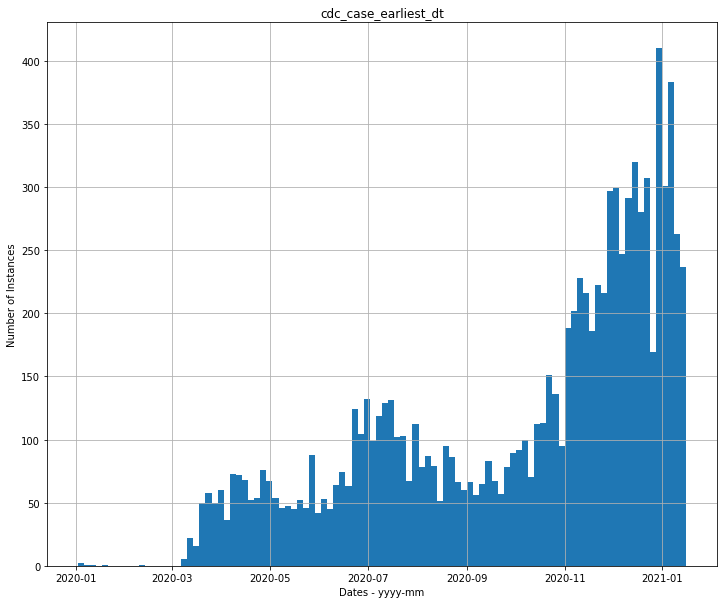

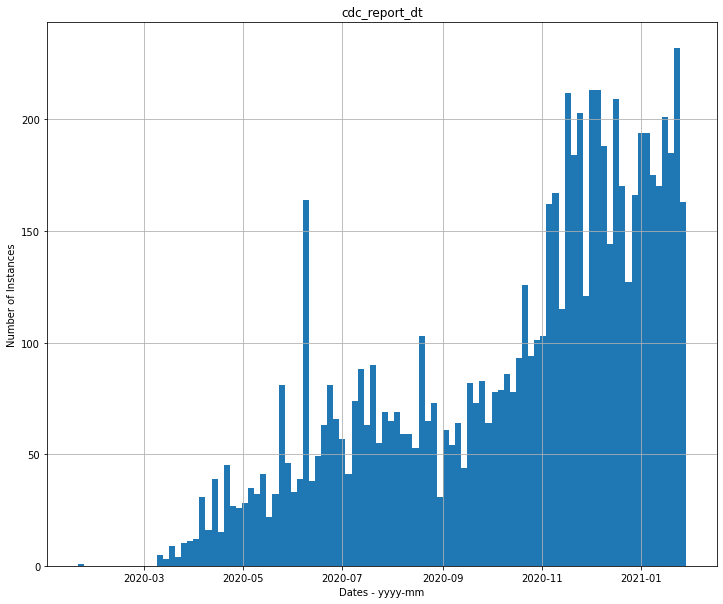

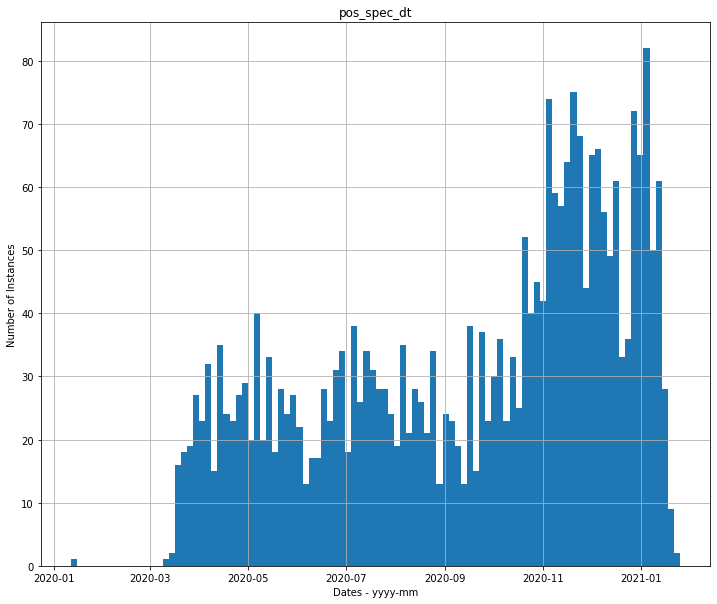

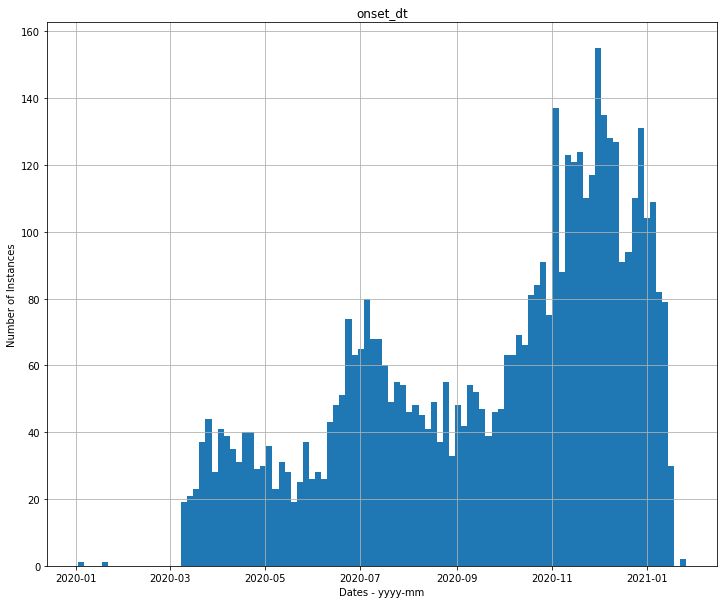

In [39]:
# create larger versions of the histograms
pp = PdfPages('20205264_continuouse_features_histograms.pdf')
for columns in continuous_columns:
    fig = df[continuous_columns].hist(column=columns, figsize=(12,10), bins=100)
    plt.title(columns)
    plt.ylabel('Number of Instances')
    plt.xlabel('Dates - yyyy-mm')
    pp.savefig()
    plt.show
pp.close()

<class 'matplotlib.axes._subplots.AxesSubplot'>


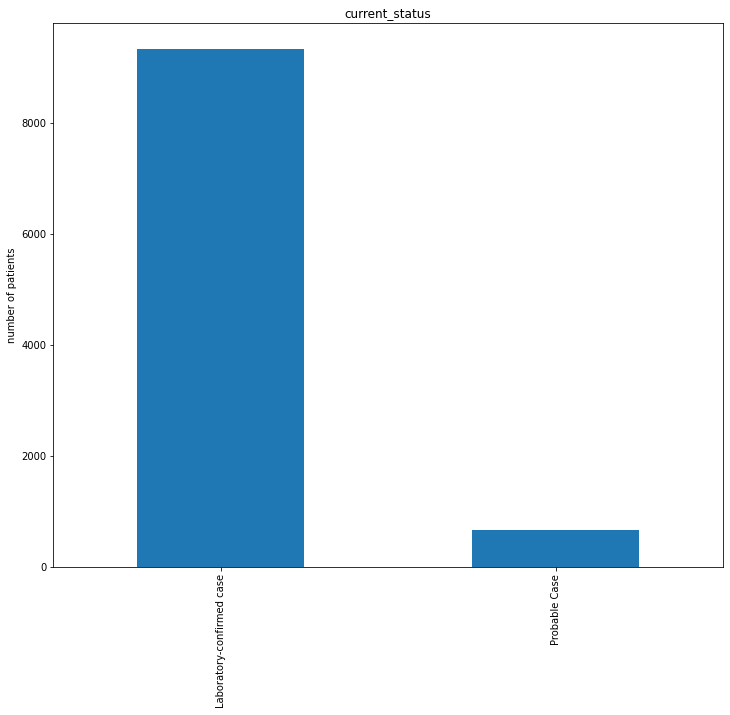

<class 'matplotlib.axes._subplots.AxesSubplot'>


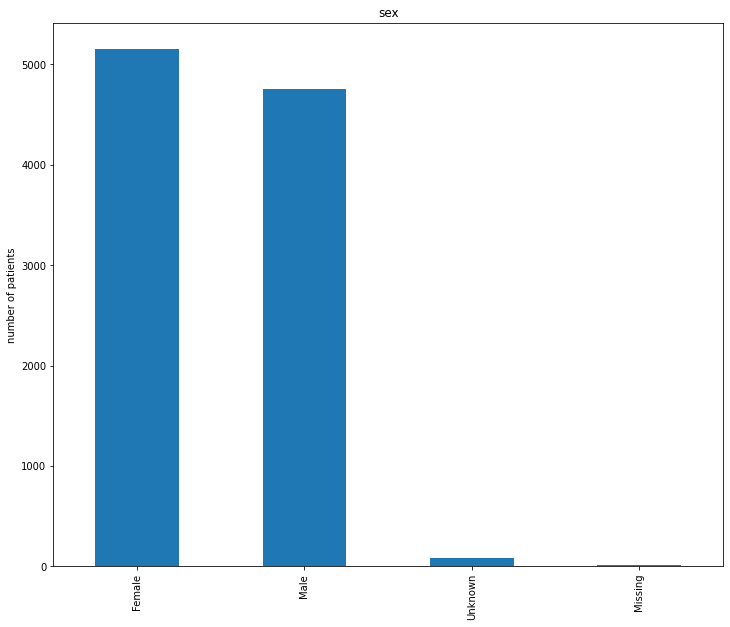

<class 'matplotlib.axes._subplots.AxesSubplot'>


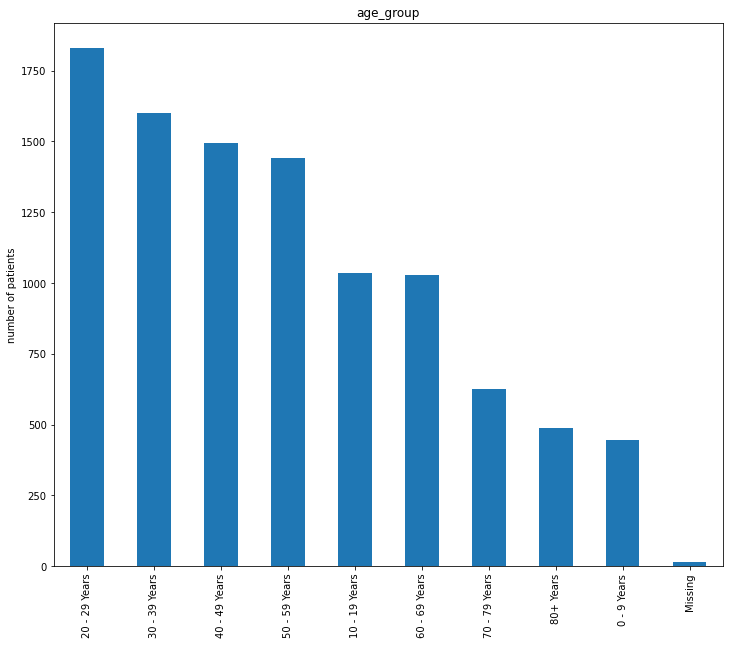

<class 'matplotlib.axes._subplots.AxesSubplot'>


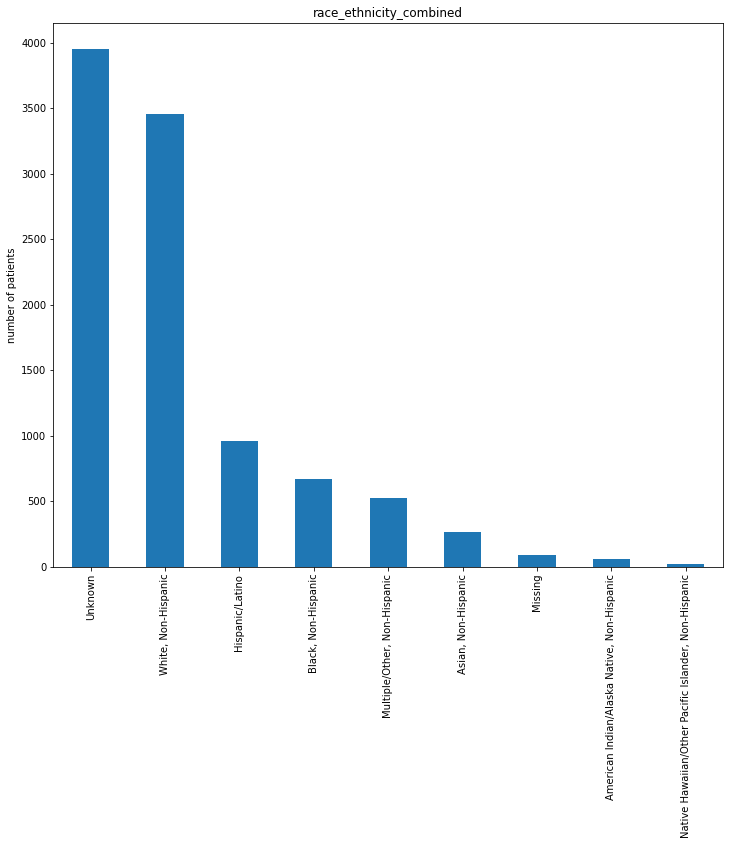

<class 'matplotlib.axes._subplots.AxesSubplot'>


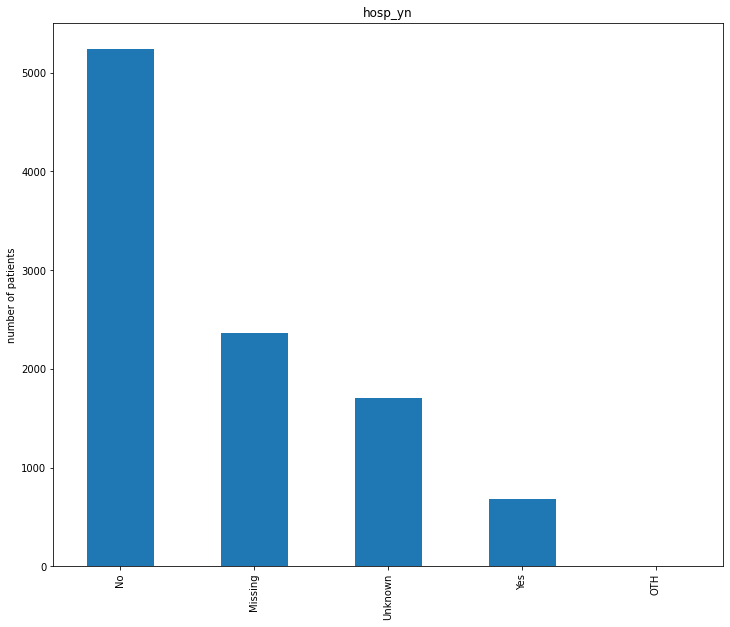

<class 'matplotlib.axes._subplots.AxesSubplot'>


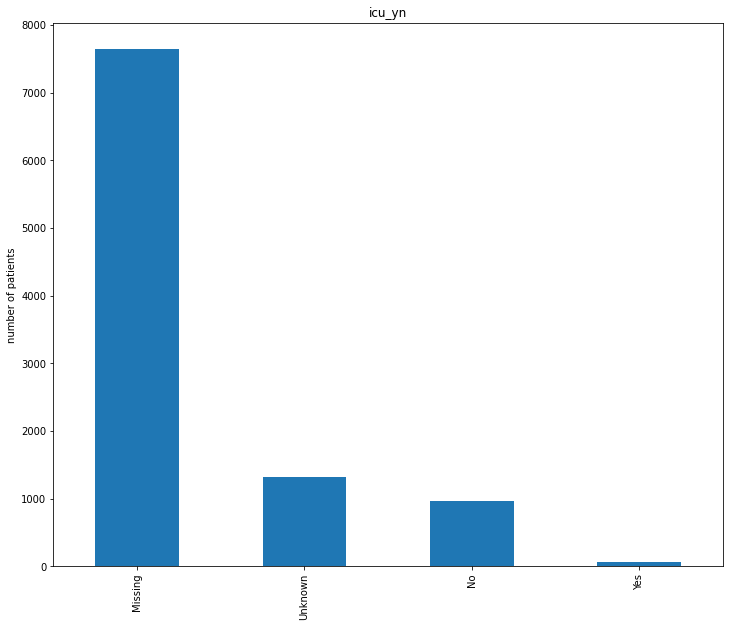

<class 'matplotlib.axes._subplots.AxesSubplot'>


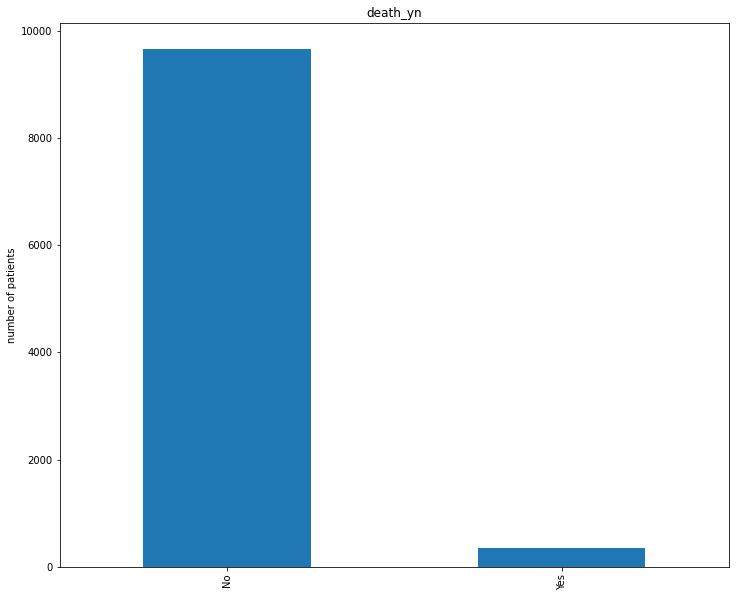

<class 'matplotlib.axes._subplots.AxesSubplot'>


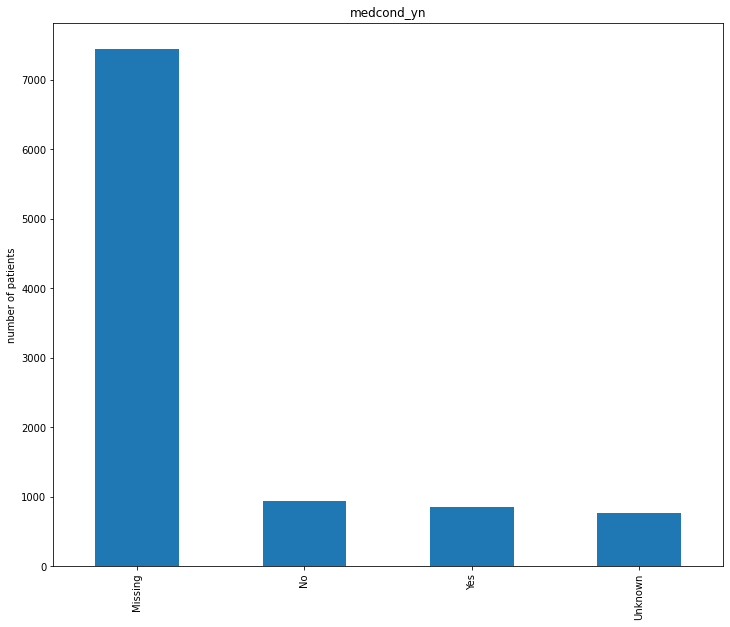

In [40]:
pp = PdfPages('20205264_categorical_features_barplots.pdf')
for col in categorical_columns:
    f = df[col].value_counts().plot(kind='bar', figsize=(12,10))
    print(type(f))
    plt.title(col)
    plt.ylabel('number of patients')
    pp.savefig(f.get_figure())
    plt.show()
pp.close()

# 2. Data Understanding: Data Quality Plan for the cleaned CSV file

# removing columns

Feature        |	Feature Type       |	Data Quality Issue      |   Handling Strategy

**cdc_case_earliest_dt**  
datetime64[ns]  
Some dates later than cdc_report_dt dates (20 rows). Some dates later than pos_spec_dt (80 rows).  
Examine rows for general integrity and adjust cdc_case_earliest_dt if needed (eg when cdc_case_earliest_dt > cdc_report_dt). Use information from integrity tests to do imputation on cdc_case_earliest_dt where values are wrong. 

**cdc_report_dt**  
datetime64[ns]  
Missing values (20%).  
Use for comparison in integrity checks and then drop as depreciated according to CDC guidelines.  

**pos_spec_dt**  
datetime64[ns]  
Missing values (70%).  
Drop after checking against other columns for logical integrity and whether any useful information can be extracted.  

**onset_dt**  
datetime64[ns]  
Some dates later than pos_spec_dt (75 rows).  
Missing values (45%).	Examine rows for general integrity (eg when compared to pos_spec_dt); if onset_dt > pos_spec_dt, assume to be close contact or health worker presenting symptoms only after testing positive, or asymptomatic. Check how it is related to the target class. 
If not useful re target class, drop it, otherwise consider creating an indicator feature first (eg derive a missing value indicator), and then drop it.  

**current_status**  
category  
None  
Do nothing.  

**sex**  
category  
Missing(0.1%) and unknown (0.5%) values.  
Since very few rows affected, drop rows with missing values after checking against other columns for logical integrity and whether any useful information can be extracted (eg how it is related to the target class.).  

**age_group**  
category  
Missing values (0.1%).  
Since very few rows affected, drop rows with missing values after checking against other columns for logical integrity and whether any useful information can be extracted.  

**race_ethnicity_combined**  
category  
Missing (0.8%) and Unknown (40.2%) values  
Combine into single Unknown value and keep.  

**hosp_yn**  
category  
Missing (21%) and Unknown(15.2%) values  
Combine into single Unknown value and keep.  

**icu_yn**  
category  
Missing(76.45%) and Unknown (13.33%) values  
Infer values from hosp_yn where possible, combine into single Unknown value and keep.  

**medcond_yn**  
category  
Missing (74.99%) and Unknown (7.78%) values  
Combine into single Unknown value and keep.  

**death_yn**  
category  
None  
Do nothing. Note: imbalanced classes (97% No and 3% Yes).  

All null values in all features should be addressed, either through imputation (where it makes sense), dropping (if only few rows), or replacing missing data with Unknown value.

In [41]:
#Create a list of indices where the values are true
test_1a_index = df.apply(lambda x: True if (x['cdc_case_earliest_dt'] > x['cdc_report_dt']) else False, axis=1)
test_1a_true_index = test_1a_index[test_1a_index == True].index
print("Number of rows effected: ", len(test_1a_true_index))
print("\n", test_1a_true_index)

Number of rows effected:  26

 Int64Index([ 134,  304,  587, 1270, 1414, 1865, 1921, 4390, 4735, 5127, 5576,
            5666, 5748, 6294, 6318, 7019, 7300, 7641, 7655, 7659, 8081, 8296,
            9315, 9553, 9817, 9852],
           dtype='int64')


In [42]:
df['cdc_case_earliest_dt'] = np.where(df['cdc_case_earliest_dt'] > df['cdc_report_dt'], df['cdc_report_dt'], df['cdc_case_earliest_dt'])


In [43]:
#Create a list of indices where the values are true
test_1a_index = df.apply(lambda x: True if (x['cdc_case_earliest_dt'] > x['cdc_report_dt']) else False, axis=1)
test_1a_true_index = test_1a_index[test_1a_index == True].index
print("Number of rows effected: ", len(test_1a_true_index))
print("\n", test_1a_true_index)

Number of rows effected:  0

 Int64Index([], dtype='int64')


In [44]:
#Create a list of indices where the values are true
test_PS_index = df.apply(lambda x: True if (x['cdc_case_earliest_dt'] > x['pos_spec_dt']) else False, axis=1)
test_PS_true_index = test_PS_index[test_PS_index == True].index
print("Number of rows effected: ", len(test_PS_true_index))
print("\n", test_PS_true_index)

Number of rows effected:  44

 Int64Index([  68,  158,  318,  373, 1057, 1210, 2025, 2391, 2480, 2575, 2636,
            2705, 2753, 2854, 3084, 3227, 3269, 3492, 3875, 4036, 4314, 5365,
            5486, 5864, 5905, 6226, 6281, 6289, 6619, 6753, 6923, 7118, 7142,
            7265, 7358, 7499, 8018, 8172, 8428, 9039, 9146, 9446, 9681, 9878],
           dtype='int64')


In [45]:
df['cdc_case_earliest_dt'] = np.where(df['cdc_case_earliest_dt'] > df['pos_spec_dt'], df['pos_spec_dt'], df['cdc_case_earliest_dt'])


In [46]:
#Create a list of indices where the values are true
test_OS_index = df.apply(lambda x: True if (x['cdc_case_earliest_dt'] > x['onset_dt']) else False, axis=1)
test_OS_true_index = test_OS_index[test_OS_index == True].index
print("Number of rows effected: ", len(test_OS_true_index))
print("\n", test_OS_true_index)

Number of rows effected:  1

 Int64Index([8271], dtype='int64')


In [47]:
df['cdc_case_earliest_dt'] = np.where(df['cdc_case_earliest_dt'] > df['onset_dt'], df['onset_dt'], df['cdc_case_earliest_dt'])


In [48]:
# a earlier than b = a < b
# a later than b = a > b

# cdc_report_dt is earlier than cdc_case_earliest_dt
test_1a = df[['cdc_case_earliest_dt', 'cdc_report_dt', 'onset_dt']][df['cdc_report_dt']<df['cdc_case_earliest_dt']]
print("Number of rows cdc_report_dt is earlier than cdc_case_earliest_dt:", test_1a.shape[0])

# onset is earlier than cdc_case_earliest_dt
test_1d = df[['cdc_case_earliest_dt', 'cdc_report_dt', 'onset_dt']][df['onset_dt']<df['cdc_case_earliest_dt']]
print("Number of rows onset is earlier than cdc_case_earliest_dt:", test_1d.shape[0])

# pos_spec_dt is earlier than cdc_case_earliest_dt
test_1i = df[['pos_spec_dt', 'cdc_case_earliest_dt']][df['pos_spec_dt']<df['cdc_case_earliest_dt']]
print("Number of rows pos_spec_dt is earlier than cdc_case_earliest_dt:", test_1i.shape[0])


Number of rows cdc_report_dt is earlier than cdc_case_earliest_dt: 0
Number of rows onset is earlier than cdc_case_earliest_dt: 0
Number of rows pos_spec_dt is earlier than cdc_case_earliest_dt: 0


In [49]:
#Create a list of indices where the values are true
test_OP_index = df.apply(lambda x: True if (x['onset_dt'] > x['pos_spec_dt']) else False, axis=1)
test_OP_true_index = test_OP_index[test_OP_index == True].index
print("Number of rows effected: ", len(test_OP_true_index))
print("\n", test_OP_true_index)

Number of rows effected:  72

 Int64Index([  68,  134,  158,  304,  318,  373,  587, 1057, 1210, 1270, 1414,
            1865, 1921, 2025, 2391, 2480, 2523, 2575, 2636, 2705, 2753, 2854,
            3084, 3227, 3269, 3492, 3875, 4036, 4314, 4390, 4557, 4735, 5127,
            5365, 5486, 5576, 5666, 5748, 5864, 5905, 6226, 6281, 6289, 6294,
            6318, 6619, 6753, 6923, 7019, 7118, 7142, 7265, 7300, 7358, 7499,
            7641, 7655, 7659, 8018, 8081, 8172, 8296, 8428, 9039, 9146, 9315,
            9446, 9553, 9681, 9817, 9852, 9878],
           dtype='int64')


In [50]:
df['onset_dt'] = np.where(df['onset_dt'] > df['pos_spec_dt'], 1, 0)

In [51]:
df.drop(columns='cdc_report_dt', inplace = True)
df.drop(columns='pos_spec_dt', inplace = True)

continuous_columns = continuous_columns.drop(['pos_spec_dt', 'cdc_report_dt'])
print(continuous_columns)

Index(['cdc_case_earliest_dt', 'onset_dt'], dtype='object')


In [52]:
df.head(5)

,cdc_case_earliest_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020-12-31,0,Probable Case,Female,50 - 59 Years,"Multiple/Other, Non-Hispanic",No,No,No,Yes
1,2020-09-29,0,Laboratory-confirmed case,Female,50 - 59 Years,"Native Hawaiian/Other Pacific Islander, Non-Hi...",No,Missing,No,Missing
2,2020-11-25,0,Laboratory-confirmed case,Female,40 - 49 Years,Unknown,Unknown,Missing,No,Missing
3,2020-11-14,0,Laboratory-confirmed case,Male,60 - 69 Years,"White, Non-Hispanic",No,Unknown,No,Yes
4,2020-11-16,0,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,No,No,No,No


In [53]:
#Create a list of indices where the values are true
sex_missing = df.apply(lambda x: True if (x['sex'] == "Missing") else False, axis=1)

sex_missing_true_index=sex_missing[sex_missing == True].index
print("Number of rows effected: ", len(sex_missing_true_index))
print("\n", sex_missing_true_index)

Number of rows effected:  10

 Int64Index([157, 298, 1728, 1963, 3640, 4006, 4422, 7304, 8002, 8956], dtype='int64')


In [54]:
df['sex'].replace('Missing', 'Unknown', inplace=True)

In [55]:
#Create a list of indices where the values are true
age_missing = df.apply(lambda x: True if (x['age_group'] == "Missing") else False, axis=1)

age_missing_true_index=age_missing[age_missing == True].index
print("Number of rows effected: ", len(age_missing_true_index))
print("\n", age_missing_true_index)

Number of rows effected:  15

 Int64Index([ 862, 1077, 2358, 3206, 3331, 3709, 4809, 5412, 7274, 7917, 8088,
            8118, 8271, 8569, 9718],
           dtype='int64')


In [56]:
#Create a list of indices where the values are true
REC_missing = df.apply(lambda x: True if (x['race_ethnicity_combined'] == "Missing") else False, axis=1)

REC_missing_true_index=REC_missing[REC_missing == True].index
print("Number of rows effected: ", len(REC_missing_true_index))
print("\n", REC_missing_true_index)

Number of rows effected:  89

 Int64Index([ 141,  568,  596, 1012, 1273, 1452, 1462, 1652, 1764, 1815, 1878,
            1890, 1957, 2206, 2440, 2461, 2536, 2650, 2698, 2740, 2869, 2911,
            3221, 3358, 3447, 3602, 3693, 3694, 3712, 3877, 3899, 3985, 3989,
            4108, 4227, 4326, 4704, 4940, 5085, 5207, 5213, 5250, 5285, 5293,
            5608, 5671, 5688, 5751, 5866, 6129, 6135, 6198, 6269, 6301, 6370,
            6438, 6477, 6759, 6788, 6849, 6920, 7047, 7092, 7209, 7445, 7462,
            7614, 7944, 8035, 8106, 8233, 8261, 8372, 8378, 8462, 8508, 8736,
            8815, 8846, 8880, 9059, 9296, 9482, 9516, 9518, 9751, 9856, 9969,
            9975],
           dtype='int64')


In [57]:
df['race_ethnicity_combined'].replace('Missing', 'Unknown', inplace=True)

In [58]:
#Create a list of indices where the values are true
hosp_missing = df.apply(lambda x: True if (x['hosp_yn'] == "Missing") else False, axis=1)

hosp_missing_true_index=hosp_missing[hosp_missing == True].index
print("Number of rows effected: ", len(hosp_missing_true_index))
print("\n", hosp_missing_true_index)

Number of rows effected:  2366

 Int64Index([   5,    6,   19,   23,   26,   30,   31,   32,   34,   36,
            ...
            9976, 9981, 9983, 9987, 9990, 9995, 9996, 9997, 9998, 9999],
           dtype='int64', length=2366)


In [59]:
df['hosp_yn'].replace('Missing', 'Unknown', inplace=True)

In [60]:
df['hosp_yn'].replace('OTH', 'Unknown', inplace=True)

In [61]:
#Create a list of indices where the values are true
hosp_oth = df.apply(lambda x: True if (x['hosp_yn'] == "OTH") else False, axis=1)

hosp_oth_true_index=hosp_oth[hosp_oth == True].index
print("Number of rows effected: ", len(hosp_oth_true_index))
print("\n", hosp_oth_true_index)

Number of rows effected:  0

 Int64Index([], dtype='int64')


In [62]:
df['icu_yn'].replace('Missing', 'Unknown', inplace=True)

In [63]:
# compare hosp no and icu unknown
hospn_icuu_df['icu_yn'].value_counts()

Missing    3827
No          798
Unknown     617
Yes           1
Name: icu_yn, dtype: int64

In [64]:
for i in hospn_icuu:
    if df.iloc[i , df.columns.get_loc("icu_yn")] == 'Unknown':
        df.iloc[i , df.columns.get_loc("icu_yn")] = 'No'
    else:
        pass

In [65]:
df.head(20)

,cdc_case_earliest_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020-12-31,0,Probable Case,Female,50 - 59 Years,"Multiple/Other, Non-Hispanic",No,No,No,Yes
1,2020-09-29,0,Laboratory-confirmed case,Female,50 - 59 Years,"Native Hawaiian/Other Pacific Islander, Non-Hi...",No,No,No,Missing
2,2020-11-25,0,Laboratory-confirmed case,Female,40 - 49 Years,Unknown,Unknown,Unknown,No,Missing
3,2020-11-14,0,Laboratory-confirmed case,Male,60 - 69 Years,"White, Non-Hispanic",No,No,No,Yes
4,2020-11-16,0,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,No,No,No,No
5,2020-09-16,0,Laboratory-confirmed case,Female,50 - 59 Years,Unknown,Unknown,Unknown,No,Missing
6,2020-07-17,0,Laboratory-confirmed case,Female,10 - 19 Years,"White, Non-Hispanic",Unknown,Unknown,No,Missing
7,2020-12-01,0,Laboratory-confirmed case,Male,80+ Years,Hispanic/Latino,Yes,Yes,Yes,Missing
8,2020-07-04,0,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",No,No,No,Yes
9,2020-03-30,0,Laboratory-confirmed case,Male,30 - 39 Years,Hispanic/Latino,Yes,Unknown,No,Missing


In [66]:
# compare hosp no and icu unknown
hospn_icuu_df['icu_yn'].value_counts()

Missing    3827
No          798
Unknown     617
Yes           1
Name: icu_yn, dtype: int64

In [67]:
df['medcond_yn'].replace('Missing', 'Unknown', inplace=True)

In [68]:
df['sex'].value_counts()

Female     5155
Male       4749
Unknown      96
Name: sex, dtype: int64

In [69]:
df['age_group'].value_counts()

20 - 29 Years    1828
30 - 39 Years    1600
40 - 49 Years    1494
50 - 59 Years    1440
10 - 19 Years    1036
60 - 69 Years    1028
70 - 79 Years     626
80+ Years         487
0 - 9 Years       446
Missing            15
Name: age_group, dtype: int64

In [70]:
#Create a list of indices where the values are true
age_group_missing = df.apply(lambda x: True if (x['age_group'] == "Missing") else False, axis=1)

age_group_missing_true_index = age_group_missing[age_group_missing == True].index
print("Number of rows effected: ", len(age_group_missing_true_index))
print("\n", age_group_missing_true_index) 

Number of rows effected:  15

 Int64Index([ 862, 1077, 2358, 3206, 3331, 3709, 4809, 5412, 7274, 7917, 8088,
            8118, 8271, 8569, 9718],
           dtype='int64')


In [71]:
df.iloc[age_group_missing_true_index]

,cdc_case_earliest_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
862,2020-10-17,0,Probable Case,Female,Missing,Unknown,No,No,No,Unknown
1077,2021-01-12,0,Probable Case,Male,Missing,Unknown,Unknown,Unknown,No,Unknown
2358,2021-01-06,0,Probable Case,Female,Missing,Unknown,No,No,No,Unknown
3206,2020-12-29,0,Probable Case,Male,Missing,Unknown,Unknown,Unknown,No,Unknown
3331,2020-07-24,0,Probable Case,Female,Missing,Unknown,Unknown,Unknown,No,Unknown
3709,2020-12-03,0,Probable Case,Male,Missing,"White, Non-Hispanic",No,No,No,Unknown
4809,2020-10-04,0,Probable Case,Female,Missing,Unknown,No,No,No,Unknown
5412,2021-01-14,0,Laboratory-confirmed case,Unknown,Missing,"Multiple/Other, Non-Hispanic",Unknown,Unknown,No,Unknown
7274,2020-12-01,0,Laboratory-confirmed case,Female,Missing,"Multiple/Other, Non-Hispanic",Unknown,Unknown,No,Unknown
7917,2020-07-02,0,Laboratory-confirmed case,Male,Missing,"White, Non-Hispanic",No,No,No,Unknown


In [72]:
#Create a list of indices where the values are true
# age_missing = df.apply(lambda x: True if (x['age'] == "Unknown" | ) else False, axis=1)
drop_age_missing = df.apply(lambda x : True if (x['age_group'] == "Missing" and x['race_ethnicity_combined'] == 'Unknown' and x['hosp_yn'] == 'Unknown'and x['icu_yn'] == 'Unknown'and x['medcond_yn'] == 'Unknown') else False, axis=1)

drop_age_missing_true_index = drop_age_missing[drop_age_missing == True].index
print("Number of rows effected: ", len(drop_age_missing_true_index))
print("\n", drop_age_missing_true_index)

Number of rows effected:  4

 Int64Index([1077, 3206, 3331, 9718], dtype='int64')


In [73]:
# Remove rows at the above indices
df.drop(index = drop_age_missing_true_index, inplace=True) 

In [74]:
#Create a list of indices where the values are true
sex_missing = df.apply(lambda x: True if (x['sex'] == "Unknown") else False, axis=1)

sex_missing_true_index = sex_missing[sex_missing == True].index
print("Number of rows effected: ", len(sex_missing_true_index))
print("\n", sex_missing_true_index) 

Number of rows effected:  95

 Int64Index([  36,   50,  157,  298,  334,  395,  402,  729,  751,  770,  787,
             888,  969,  977, 1083, 1116, 1245, 1419, 1513, 1586, 1594, 1683,
            1727, 1728, 1813, 1963, 2036, 2141, 2501, 2585, 2935, 3020, 3345,
            3402, 3640, 4006, 4022, 4057, 4101, 4238, 4371, 4374, 4422, 4475,
            4492, 4561, 4648, 4665, 4898, 4967, 5111, 5219, 5268, 5278, 5412,
            5471, 5496, 5536, 5581, 5940, 5954, 6336, 6356, 6371, 6399, 6500,
            6530, 6550, 6669, 6806, 7055, 7133, 7286, 7304, 7395, 7529, 7537,
            7538, 7556, 7577, 7663, 7943, 8002, 8150, 8155, 8220, 8288, 8399,
            8533, 8911, 8956, 9249, 9539, 9819, 9831],
           dtype='int64')


In [75]:
df.iloc[sex_missing_true_index]

,cdc_case_earliest_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
36,2020-12-15,0,Laboratory-confirmed case,Unknown,60 - 69 Years,"Asian, Non-Hispanic",Unknown,Unknown,No,Unknown
50,2020-12-30,0,Laboratory-confirmed case,Unknown,40 - 49 Years,Unknown,Unknown,Unknown,No,Unknown
157,2020-10-30,0,Laboratory-confirmed case,Unknown,40 - 49 Years,"White, Non-Hispanic",No,No,No,Unknown
298,2020-09-06,0,Probable Case,Unknown,20 - 29 Years,Unknown,No,No,No,No
334,2020-12-18,0,Laboratory-confirmed case,Unknown,30 - 39 Years,"Multiple/Other, Non-Hispanic",Unknown,Unknown,No,Unknown
395,2020-06-25,0,Laboratory-confirmed case,Unknown,40 - 49 Years,Hispanic/Latino,No,No,No,Unknown
402,2020-04-03,0,Laboratory-confirmed case,Unknown,40 - 49 Years,"White, Non-Hispanic",No,No,No,Unknown
729,2021-01-07,0,Laboratory-confirmed case,Unknown,30 - 39 Years,Unknown,Unknown,Unknown,No,Unknown
751,2021-01-12,0,Laboratory-confirmed case,Unknown,30 - 39 Years,Unknown,Unknown,Unknown,No,Unknown
770,2020-12-23,0,Laboratory-confirmed case,Unknown,70 - 79 Years,Unknown,Unknown,Unknown,No,Unknown


In [76]:
#Create a list of indices where the values are true
# sex_missing = df.apply(lambda x: True if (x['sex'] == "Unknown" | ) else False, axis=1)
drop_sex_missing = df.apply(lambda x : True if (x['sex'] == "Unknown" and x['race_ethnicity_combined'] == 'Unknown' and x['hosp_yn'] == 'Unknown'and x['icu_yn'] == 'Unknown'and x['medcond_yn'] == 'Unknown') else False, axis=1)

drop_sex_missing_true_index = drop_sex_missing[drop_sex_missing == True].index
print("Number of rows effected: ", len(drop_sex_missing_true_index))
print("\n", drop_sex_missing_true_index)

Number of rows effected:  52

 Int64Index([  50,  729,  751,  770,  787,  888,  977, 1083, 1116, 1419, 1586,
            1683, 1727, 2141, 2501, 2585, 3020, 3345, 3402, 3640, 4022, 4057,
            4101, 4371, 4422, 4898, 4967, 5111, 5268, 5278, 5471, 5496, 5940,
            5954, 6336, 6371, 6399, 6550, 6669, 6806, 7055, 7286, 7529, 7537,
            7556, 7577, 7943, 8155, 8399, 8911, 9819, 9831],
           dtype='int64')


In [77]:
# Remove rows at the above indices
df.drop(index = drop_sex_missing_true_index, inplace=True) 

In [78]:
df['age_group'].replace('Missing', 'Unknown', inplace=True)

In [79]:
df.dtypes

cdc_case_earliest_dt       datetime64[ns]
onset_dt                            int64
current_status                   category
sex                              category
age_group                        category
race_ethnicity_combined          category
hosp_yn                          category
icu_yn                           category
death_yn                         category
medcond_yn                       category
dtype: object

In [80]:
df['onset_dt'] = df['onset_dt'].astype('category')

In [81]:
categorical_columns = df[['onset_dt', 'current_status', 'sex', 'age_group', 'race_ethnicity_combined', 'hosp_yn', 'icu_yn', 'death_yn', 'medcond_yn']].columns

In [82]:
continuous_columns = continuous_columns.drop('onset_dt')
print(continuous_columns)

Index(['cdc_case_earliest_dt'], dtype='object')


In [83]:
dfNaN2 = df.copy(deep=True)

In [84]:
dfNaN2.replace('Missing', np.nan, inplace=True)

In [85]:
dfNaN2.isnull().sum()

cdc_case_earliest_dt       0
onset_dt                   0
current_status             0
sex                        0
age_group                  0
race_ethnicity_combined    0
hosp_yn                    0
icu_yn                     0
death_yn                   0
medcond_yn                 0
dtype: int64

In [86]:
dates_series = df['cdc_case_earliest_dt']
dates_series = dates_series.fillna('Missing')
counts_dict = dates_series.to_dict()
# error checking print(counts_dict)
dates_list = []
for i in counts_dict:
    dates_list.append(counts_dict[i])
# error checking print('counts_list', len(counts_list))

dates = []
for i in dates_list:
    dates.append(i.strftime("%Y%m%d"))

print('dates_list', len(dates_list) )
print('type', type(dates[1]))
# error checking print(dates)

dates_list 9944
type <class 'str'>


In [87]:
months = []
monthsDict = {1:'January', 2:'February', 3:'March', 4:'Arpil', 5:'May', 6: 'June', 7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
for i in dates_list:
#     temp = monthsDict[i.month]
    months.append(i.month)
    

In [88]:
print(months, len(months))

[12, 9, 11, 11, 11, 9, 7, 12, 7, 3, 12, 12, 6, 4, 10, 11, 7, 8, 1, 11, 10, 12, 8, 12, 4, 7, 1, 11, 12, 11, 12, 1, 12, 6, 6, 11, 12, 12, 12, 5, 9, 12, 11, 7, 7, 7, 1, 12, 12, 12, 12, 11, 12, 10, 12, 9, 1, 10, 11, 3, 7, 10, 1, 5, 11, 8, 1, 12, 4, 11, 7, 12, 1, 12, 12, 12, 7, 1, 1, 12, 8, 11, 7, 3, 8, 4, 12, 5, 11, 10, 12, 8, 8, 10, 6, 10, 7, 6, 6, 8, 11, 10, 1, 10, 11, 8, 7, 7, 9, 12, 11, 7, 8, 5, 5, 12, 11, 5, 5, 10, 12, 1, 10, 3, 12, 12, 7, 6, 12, 11, 10, 5, 1, 12, 12, 12, 10, 12, 11, 11, 1, 8, 11, 11, 11, 7, 11, 12, 12, 8, 10, 7, 1, 3, 12, 12, 10, 7, 12, 8, 1, 11, 8, 8, 5, 9, 6, 12, 12, 1, 11, 12, 1, 12, 10, 6, 10, 4, 8, 9, 12, 9, 12, 1, 1, 11, 1, 7, 1, 9, 1, 1, 12, 12, 12, 11, 7, 12, 12, 1, 6, 4, 7, 10, 12, 11, 11, 1, 12, 6, 3, 10, 9, 12, 12, 9, 12, 11, 7, 9, 11, 12, 8, 12, 5, 1, 7, 6, 6, 7, 11, 7, 11, 12, 11, 12, 12, 7, 11, 8, 10, 12, 7, 12, 12, 12, 3, 1, 1, 10, 3, 11, 12, 11, 10, 12, 1, 4, 11, 11, 12, 12, 7, 1, 12, 12, 1, 10, 11, 7, 8, 10, 5, 12, 12, 3, 10, 12, 12, 12, 8, 5, 9, 4, 

In [89]:
df['cdc_case_earliest_mt'] = months

In [90]:
years = []
for i in dates_list:
    years.append(i.year)
    
df['cdc_case_earliest_yr'] = years

In [91]:
df.head()

,cdc_case_earliest_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn,cdc_case_earliest_mt,cdc_case_earliest_yr
0,2020-12-31,0,Probable Case,Female,50 - 59 Years,"Multiple/Other, Non-Hispanic",No,No,No,Yes,12,2020
1,2020-09-29,0,Laboratory-confirmed case,Female,50 - 59 Years,"Native Hawaiian/Other Pacific Islander, Non-Hi...",No,No,No,Unknown,9,2020
2,2020-11-25,0,Laboratory-confirmed case,Female,40 - 49 Years,Unknown,Unknown,Unknown,No,Unknown,11,2020
3,2020-11-14,0,Laboratory-confirmed case,Male,60 - 69 Years,"White, Non-Hispanic",No,No,No,Yes,11,2020
4,2020-11-16,0,Laboratory-confirmed case,Male,0 - 9 Years,Unknown,No,No,No,No,11,2020


In [92]:
# Export cleaned dataframe to csv file
df.to_csv('20205264_Cleaned_dataframe_using_data_quality_plan.csv', index=False)